# 导入相关模块

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyecharts
from pyecharts import options as opts 
from pyecharts.globals import SymbolType
from pyecharts.charts import Bar  
from pyecharts.charts import Pie  
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
import warnings 
warnings.filterwarnings ("ignore")

In [2]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
sns.set_palette('pastel')
sns.set(style="whitegrid",rc={'axes.facecolor':'#f5f5f5'})
sns.set_context("notebook", font_scale=0.7, rc={"lines.linewidth":1.2})
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False

# 读取数据

In [3]:
LowFoor = pd.read_excel(r"./house_data.xlsx",sheet_name=0)
LowFoor

,小区名字,总价,户型,建筑面积,单价,朝向,楼层,装修,区域,物业费,停车位,建造年份
0,中天北湾新城,89万,2室2厅1卫,89平米,10000元/平米,南北,低层,毛坯,高新,1.25元/㎡/月,1053,2012年
1,华润橡府,400万,2室2厅2卫,209平米,19139元/平米,南北,低层,毛坯,南关,0.5元/㎡/月,1200,2015年
2,华润凯旋门,120万,2室2厅1卫,91平米,13187元/平米,南北,低层,精装修,高新,0.3元/㎡/月,550,2015年
3,富豪花园,89.9万,2室2厅1卫,93平米,9667元/平米,南北,低层,精装修,朝阳,3元/㎡/月,110,2004年
4,我的家园,105万,3室2厅2卫,148平米,7095元/平米,南北,低层,精装修,南关,0.5元/㎡/月,1100,2004年
...,...,...,...,...,...,...,...,...,...,...,...,...
617,恒大名都,138万,4室2厅4卫,170平米,8118元/平米,南北,低层,精装修,高新,0.65元/㎡/月,736,2018年
618,华瀚四季花园,108万,2室2厅2卫,112平米,9643元/平米,南北,低层,精装修,绿园,2.2元/㎡/月,5700,2013年
619,上东街区,72万,2室1厅1卫,79.82平米,9020元/平米,南北,低层,精装修,二道,2.1元/㎡/月,2364,2001年
620,恒大都市广场,130万,3室2厅2卫,132.54平米,9808元/平米,南北,低层,精装修,二道,0.3元/㎡/月,1200,2017年


In [4]:
CenterFoor=pd.read_excel(r"./house_data.xlsx",sheet_name=1)
CenterFoor

,小区名字,总价,户型,建筑面积,单价,朝向,楼层,装修,区域,物业费,停车位,建造年份
0,桦林苑,99.8万,3室2厅1卫,143平米,6979元/平米,南北,中层,毛坯,净月,1.9元/㎡/月,3453,2010年
1,长电紫盈花城,96万,2室2厅1卫,90平米,10667元/平米,南北,中层,精装修,二道,1.3元/㎡/月,4198,2008年
2,万科上东区,107万,3室2厅1卫,99.44平米,10760元/平米,南,中层,精装修,二道,2.11元/㎡/月,3867,2016年
3,诺睿德国际商务广场,105万,3室2厅1卫,92.7平米,11327元/平米,南北,中层,精装修,净月,2.1元/㎡/月,2056,2017年
4,华润橡树湾,198万,4室2厅2卫,142.1平米,13934元/平米,南北,中层,精装修,南关,2.4元/㎡/月,4143,2015年
...,...,...,...,...,...,...,...,...,...,...,...,...
1045,嘉柏湾,78万,2室1厅1卫,90平米,8667元/平米,南北,中层,豪华装修,经开,1.9元/㎡/月,3926,2011年
1046,锦绣东南,70万,2室2厅1卫,89.32平米,7837元/平米,南北,中层,精装修,净月,4.35元/㎡/月,300,2007年
1047,枫林园,99.8万,2室2厅1卫,91.3平米,10931元/平米,南北,中层,精装修,二道,2.65元/㎡/月,1200,2000年
1048,经开四区,75万,2室2厅1卫,110平米,6818元/平米,南北,中层,精装修,经开,3.6元/㎡/月,1200,2010年


In [5]:
HightFoor=pd.read_excel(r"./house_data.xlsx",sheet_name=2)
HightFoor

,小区名字,总价,户型,建筑面积,单价,朝向,楼层,装修,区域,物业费,停车位,建造年份
0,嘉柏湾,32万,1室1厅1卫,43.3平米,7390元/平米,南,高层,精装修,经开,1.9元/㎡/月,3926,2011年
1,中环12区,51.5万,2室1厅1卫,57平米,9035元/平米,南北,高层,精装修,南关,1.9元/㎡/月,446,2014年
2,昊源高格蓝湾,210万,3室2厅2卫,160.8平米,13060元/平米,南北,高层,精装修,二道,1.5元/㎡/月,3040,2007年
3,金色橄榄城,118万,3室1厅1卫,200平米,5900元/平米,南北,高层,简装修,二道,2.5元/㎡/月,2410,2003年
4,新星宇和润,84万,2室1厅1卫,75.06平米,11191元/平米,南北,高层,精装修,南关,1.95元/㎡/月,2000,2017年
...,...,...,...,...,...,...,...,...,...,...,...,...
874,长影世纪村,260万,3室2厅2卫,160平米,16250元/平米,南北,高层,精装修,朝阳,2.3元/㎡/月,1261,2017年
875,阳光华尔兹,93万,2室2厅1卫,90平米,10333元/平米,南北,高层,精装修,二道,2.72元/㎡/月,636,2015年
876,中海蘭庭,110万,2室2厅1卫,86.23平米,12757元/平米,南北,高层,精装修,高新,1.4元/㎡/月,1000,2015年
877,亚泰杏花苑,56.8万,2室2厅1卫,66平米,8606元/平米,东,高层,精装修,二道,2.13元/㎡/月,800,2009年


# 合并数据

In [6]:
xiebq=pd.concat([LowFoor,CenterFoor,HightFoor], ignore_index=True)
xiebq

,小区名字,总价,户型,建筑面积,单价,朝向,楼层,装修,区域,物业费,停车位,建造年份
0,中天北湾新城,89万,2室2厅1卫,89平米,10000元/平米,南北,低层,毛坯,高新,1.25元/㎡/月,1053,2012年
1,华润橡府,400万,2室2厅2卫,209平米,19139元/平米,南北,低层,毛坯,南关,0.5元/㎡/月,1200,2015年
2,华润凯旋门,120万,2室2厅1卫,91平米,13187元/平米,南北,低层,精装修,高新,0.3元/㎡/月,550,2015年
3,富豪花园,89.9万,2室2厅1卫,93平米,9667元/平米,南北,低层,精装修,朝阳,3元/㎡/月,110,2004年
4,我的家园,105万,3室2厅2卫,148平米,7095元/平米,南北,低层,精装修,南关,0.5元/㎡/月,1100,2004年
...,...,...,...,...,...,...,...,...,...,...,...,...
2546,长影世纪村,260万,3室2厅2卫,160平米,16250元/平米,南北,高层,精装修,朝阳,2.3元/㎡/月,1261,2017年
2547,阳光华尔兹,93万,2室2厅1卫,90平米,10333元/平米,南北,高层,精装修,二道,2.72元/㎡/月,636,2015年
2548,中海蘭庭,110万,2室2厅1卫,86.23平米,12757元/平米,南北,高层,精装修,高新,1.4元/㎡/月,1000,2015年
2549,亚泰杏花苑,56.8万,2室2厅1卫,66平米,8606元/平米,东,高层,精装修,二道,2.13元/㎡/月,800,2009年


# 预览数据

## 查看行列数

In [7]:
xiebq.shape

(2551, 12)

## 查看列名

In [8]:
xiebq.columns

Index(['小区名字', '总价', '户型', '建筑面积', '单价', '朝向', '楼层', '装修', '区域', '物业费', '停车位',
       '建造年份'],
      dtype='object')

## 查看基本信息

In [9]:
xiebq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   小区名字    2551 non-null   object
 1   总价      2551 non-null   object
 2   户型      2551 non-null   object
 3   建筑面积    2551 non-null   object
 4   单价      2551 non-null   object
 5   朝向      2551 non-null   object
 6   楼层      2551 non-null   object
 7   装修      2551 non-null   object
 8   区域      2551 non-null   object
 9   物业费     2551 non-null   object
 10  停车位     2551 non-null   int64 
 11  建造年份    2551 non-null   object
dtypes: int64(1), object(11)
memory usage: 239.3+ KB


## 查看重复值

In [10]:
xiebq.duplicated().sum()

114

## 查看缺失值

In [11]:
xiebq.isnull().sum()

小区名字    0
总价      0
户型      0
建筑面积    0
单价      0
朝向      0
楼层      0
装修      0
区域      0
物业费     0
停车位     0
建造年份    0
dtype: int64

# 数据预处理

## 删除合并后的数据的重复值

In [12]:
xiebq.drop_duplicates(inplace=True)
xiebq

,小区名字,总价,户型,建筑面积,单价,朝向,楼层,装修,区域,物业费,停车位,建造年份
0,中天北湾新城,89万,2室2厅1卫,89平米,10000元/平米,南北,低层,毛坯,高新,1.25元/㎡/月,1053,2012年
1,华润橡府,400万,2室2厅2卫,209平米,19139元/平米,南北,低层,毛坯,南关,0.5元/㎡/月,1200,2015年
2,华润凯旋门,120万,2室2厅1卫,91平米,13187元/平米,南北,低层,精装修,高新,0.3元/㎡/月,550,2015年
3,富豪花园,89.9万,2室2厅1卫,93平米,9667元/平米,南北,低层,精装修,朝阳,3元/㎡/月,110,2004年
4,我的家园,105万,3室2厅2卫,148平米,7095元/平米,南北,低层,精装修,南关,0.5元/㎡/月,1100,2004年
...,...,...,...,...,...,...,...,...,...,...,...,...
2546,长影世纪村,260万,3室2厅2卫,160平米,16250元/平米,南北,高层,精装修,朝阳,2.3元/㎡/月,1261,2017年
2547,阳光华尔兹,93万,2室2厅1卫,90平米,10333元/平米,南北,高层,精装修,二道,2.72元/㎡/月,636,2015年
2548,中海蘭庭,110万,2室2厅1卫,86.23平米,12757元/平米,南北,高层,精装修,高新,1.4元/㎡/月,1000,2015年
2549,亚泰杏花苑,56.8万,2室2厅1卫,66平米,8606元/平米,东,高层,精装修,二道,2.13元/㎡/月,800,2009年


In [13]:
xiebq.reset_index(drop=True,inplace=True)
xiebq

,小区名字,总价,户型,建筑面积,单价,朝向,楼层,装修,区域,物业费,停车位,建造年份
0,中天北湾新城,89万,2室2厅1卫,89平米,10000元/平米,南北,低层,毛坯,高新,1.25元/㎡/月,1053,2012年
1,华润橡府,400万,2室2厅2卫,209平米,19139元/平米,南北,低层,毛坯,南关,0.5元/㎡/月,1200,2015年
2,华润凯旋门,120万,2室2厅1卫,91平米,13187元/平米,南北,低层,精装修,高新,0.3元/㎡/月,550,2015年
3,富豪花园,89.9万,2室2厅1卫,93平米,9667元/平米,南北,低层,精装修,朝阳,3元/㎡/月,110,2004年
4,我的家园,105万,3室2厅2卫,148平米,7095元/平米,南北,低层,精装修,南关,0.5元/㎡/月,1100,2004年
...,...,...,...,...,...,...,...,...,...,...,...,...
2432,长影世纪村,260万,3室2厅2卫,160平米,16250元/平米,南北,高层,精装修,朝阳,2.3元/㎡/月,1261,2017年
2433,阳光华尔兹,93万,2室2厅1卫,90平米,10333元/平米,南北,高层,精装修,二道,2.72元/㎡/月,636,2015年
2434,中海蘭庭,110万,2室2厅1卫,86.23平米,12757元/平米,南北,高层,精装修,高新,1.4元/㎡/月,1000,2015年
2435,亚泰杏花苑,56.8万,2室2厅1卫,66平米,8606元/平米,东,高层,精装修,二道,2.13元/㎡/月,800,2009年


## 将总价、建筑面积、单价、物业费、建造年份字段的单位去掉

In [14]:
xiebq['总价'] = xiebq['总价'].str.replace('万', '')
xiebq['建筑面积']=xiebq['建筑面积'].str.replace('平米','')
xiebq['单价']=xiebq['单价'].str.replace('元/平米','')
xiebq['物业费']=xiebq['物业费'].str.replace('元/㎡/月','')
xiebq['建造年份'] = xiebq['建造年份'].str.replace('年', '')

In [15]:
xiebq

,小区名字,总价,户型,建筑面积,单价,朝向,楼层,装修,区域,物业费,停车位,建造年份
0,中天北湾新城,89,2室2厅1卫,89,10000,南北,低层,毛坯,高新,1.25,1053,2012
1,华润橡府,400,2室2厅2卫,209,19139,南北,低层,毛坯,南关,0.5,1200,2015
2,华润凯旋门,120,2室2厅1卫,91,13187,南北,低层,精装修,高新,0.3,550,2015
3,富豪花园,89.9,2室2厅1卫,93,9667,南北,低层,精装修,朝阳,3,110,2004
4,我的家园,105,3室2厅2卫,148,7095,南北,低层,精装修,南关,0.5,1100,2004
...,...,...,...,...,...,...,...,...,...,...,...,...
2432,长影世纪村,260,3室2厅2卫,160,16250,南北,高层,精装修,朝阳,2.3,1261,2017
2433,阳光华尔兹,93,2室2厅1卫,90,10333,南北,高层,精装修,二道,2.72,636,2015
2434,中海蘭庭,110,2室2厅1卫,86.23,12757,南北,高层,精装修,高新,1.4,1000,2015
2435,亚泰杏花苑,56.8,2室2厅1卫,66,8606,东,高层,精装修,二道,2.13,800,2009


## 转换数据类型

In [16]:
xiebq[['总价','建筑面积','单价','物业费']]=xiebq[['总价','建筑面积','单价','物业费']].astype(float)

In [17]:
xiebq['建造年份']=xiebq['建造年份'].astype(int)

In [18]:
xiebq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2437 entries, 0 to 2436
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   小区名字    2437 non-null   object 
 1   总价      2437 non-null   float64
 2   户型      2437 non-null   object 
 3   建筑面积    2437 non-null   float64
 4   单价      2437 non-null   float64
 5   朝向      2437 non-null   object 
 6   楼层      2437 non-null   object 
 7   装修      2437 non-null   object 
 8   区域      2437 non-null   object 
 9   物业费     2437 non-null   float64
 10  停车位     2437 non-null   int64  
 11  建造年份    2437 non-null   int32  
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 219.1+ KB


## 新增一列"房龄"数据

In [19]:
xiebq['房龄']=2024-xiebq['建造年份']
xiebq

,小区名字,总价,户型,建筑面积,单价,朝向,楼层,装修,区域,物业费,停车位,建造年份,房龄
0,中天北湾新城,89.0,2室2厅1卫,89.00,10000.0,南北,低层,毛坯,高新,1.25,1053,2012,12
1,华润橡府,400.0,2室2厅2卫,209.00,19139.0,南北,低层,毛坯,南关,0.50,1200,2015,9
2,华润凯旋门,120.0,2室2厅1卫,91.00,13187.0,南北,低层,精装修,高新,0.30,550,2015,9
3,富豪花园,89.9,2室2厅1卫,93.00,9667.0,南北,低层,精装修,朝阳,3.00,110,2004,20
4,我的家园,105.0,3室2厅2卫,148.00,7095.0,南北,低层,精装修,南关,0.50,1100,2004,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,长影世纪村,260.0,3室2厅2卫,160.00,16250.0,南北,高层,精装修,朝阳,2.30,1261,2017,7
2433,阳光华尔兹,93.0,2室2厅1卫,90.00,10333.0,南北,高层,精装修,二道,2.72,636,2015,9
2434,中海蘭庭,110.0,2室2厅1卫,86.23,12757.0,南北,高层,精装修,高新,1.40,1000,2015,9
2435,亚泰杏花苑,56.8,2室2厅1卫,66.00,8606.0,东,高层,精装修,二道,2.13,800,2009,15


# 数据筛选

## 查看总价在200万以上（包含200万），楼层在中层且是精装修的房源数据

In [20]:
house1 = xiebq[(xiebq['总价']>=200) & (xiebq['楼层'].isin(['中层'])) & (xiebq['装修'].isin(['精装修']))]  
house1

,小区名字,总价,户型,建筑面积,单价,朝向,楼层,装修,区域,物业费,停车位,建造年份,房龄
658,国信美邑,225.0,4室2厅2卫,150.00,15000.0,南北,中层,精装修,净月,4.64,600,2015,9
851,恒大绿洲,320.0,6室2厅4卫,317.61,10075.0,南北,中层,精装修,高新,0.30,1200,2018,6
1037,东北师大附中家属楼,210.0,3室1厅1卫,104.00,20192.0,南北,中层,精装修,朝阳,1.55,1730,2000,24
1100,中海水岸春城,260.0,4室3厅2卫,200.00,13000.0,南北,中层,精装修,净月,1.98,2630,2015,9
1173,御翠湾,210.0,3室2厅2卫,169.00,12426.0,南北,中层,精装修,高新,2.50,1200,2019,5
1190,师大二教,210.0,2室1厅1卫,78.00,26923.0,南北,中层,精装修,朝阳,0.60,480,2003,21
1192,亚泰杏花苑,298.0,5室4厅3卫,339.00,8791.0,南北,中层,精装修,二道,2.13,800,2009,15
1204,恒大绿洲,310.0,4室2厅4卫,319.00,9718.0,南,中层,精装修,高新,2.50,2007,2018,6
1225,南湖新村,210.0,2室2厅1卫,80.00,26250.0,南北,中层,精装修,朝阳,3.20,950,2017,7
1250,万科柏翠园,240.0,4室2厅2卫,140.00,17143.0,南北,中层,精装修,朝阳,3.46,1600,2016,8


## 按照"总价"降序排序

In [21]:
house1 = house1.sort_values(by='总价', ascending=False)
house1

,小区名字,总价,户型,建筑面积,单价,朝向,楼层,装修,区域,物业费,停车位,建造年份,房龄
1271,万科柏翠园,360.0,3室2厅2卫,168.50,21365.0,南北,中层,精装修,朝阳,3.46,1600,2016,8
851,恒大绿洲,320.0,6室2厅4卫,317.61,10075.0,南北,中层,精装修,高新,0.30,1200,2018,6
1204,恒大绿洲,310.0,4室2厅4卫,319.00,9718.0,南,中层,精装修,高新,2.50,2007,2018,6
1192,亚泰杏花苑,298.0,5室4厅3卫,339.00,8791.0,南北,中层,精装修,二道,2.13,800,2009,15
1100,中海水岸春城,260.0,4室3厅2卫,200.00,13000.0,南北,中层,精装修,净月,1.98,2630,2015,9
1450,天茂湖三期温莎园,245.0,3室2厅2卫,173.00,14162.0,南北,中层,精装修,高新,2.00,900,2017,7
1250,万科柏翠园,240.0,4室2厅2卫,140.00,17143.0,南北,中层,精装修,朝阳,3.46,1600,2016,8
1559,长春明珠,226.0,3室2厅2卫,190.00,11895.0,南北,中层,精装修,南关,3.00,800,2018,6
658,国信美邑,225.0,4室2厅2卫,150.00,15000.0,南北,中层,精装修,净月,4.64,600,2015,9
1402,南湖新村,220.0,2室1厅1卫,114.00,19298.0,南北,中层,精装修,朝阳,2.26,3600,2017,7


## 输出"小区名字"、"区域"、"总价"的前5条数据

In [22]:
house2 = house1[['小区名字', '区域', '总价']].head(5)  
house2

,小区名字,区域,总价
1271,万科柏翠园,朝阳,360.0
851,恒大绿洲,高新,320.0
1204,恒大绿洲,高新,310.0
1192,亚泰杏花苑,二道,298.0
1100,中海水岸春城,净月,260.0


# 描述性统计分析

## 计算每个小区的房源总数

In [23]:
HouseSun = xiebq.groupby('小区名字').size().sort_values(ascending=False)
HouseSun

小区名字
亚泰梧桐公馆     43
华大城        36
恒大名都       35
中天北湾新城     32
南湖新村       31
           ..
富锋清华园       1
富贵居         1
208医院小区     1
富苑花园        1
龙首壹号院       1
Length: 675, dtype: int64

In [24]:
HouseSun.head(10)

小区名字
亚泰梧桐公馆    43
华大城       36
恒大名都      35
中天北湾新城    32
南湖新村      31
中海国际社区    31
吉盛小区      30
亚泰樱花苑     29
亚泰杏花苑     27
怡众名城      26
dtype: int64

## 分析数据中哪个小区的房源总价最高，并计算其平均单价

In [25]:
AvgPrice = xiebq.groupby('小区名字').agg({'总价': 'sum', '建筑面积': 'sum'}).reset_index()   
AvgPrice['平均单价'] = AvgPrice['总价'] / AvgPrice['建筑面积'] 
AvgPrice

,小区名字,总价,建筑面积,平均单价
0,133厂宿舍,56.0,85.17,0.657509
1,208医院小区,83.0,115.00,0.721739
2,一品红城,191.0,144.00,1.326389
3,一汽18街区,42.0,53.00,0.792453
4,一汽22街区,186.5,270.20,0.690229
...,...,...,...,...
670,龙城富苑,44.0,98.00,0.448980
671,龙富小区,69.0,85.00,0.811765
672,龙泰檀香苑,310.6,295.07,1.052632
673,龙润福湾国际,149.0,355.44,0.419199


In [26]:
# 找出总价最高的小区  
MoreHight = AvgPrice.loc[AvgPrice['总价'].idxmax()] 
MoreHight

小区名字     中海国际社区
总价       6536.5
建筑面积    4068.58
平均单价    1.60658
Name: 109, dtype: object

## 描述房价的总价分布情况（例如，平均值、中位数、标准差、最小值、最大值）

In [27]:
stats = xiebq['总价'].describe()
median = xiebq['总价'].median()  
print(f"平均值: {stats['mean']:.2f}")  
print(f"中位数: {median:.2f}")  
print(f"标准差: {stats['std']:.2f}")  
print(f"最小值: {stats['min']:.2f}")  
print(f"最大值: {stats['max']:.2f}")

平均值: 111.68
中位数: 92.00
标准差: 91.56
最小值: 13.00
最大值: 1500.00


## 分析哪种户型的房源最多

In [28]:
house_types = xiebq['户型'].value_counts() 
house_types

2室2厅1卫    912
2室1厅1卫    546
3室2厅2卫    339
3室2厅1卫    206
1室1厅1卫    158
4室2厅2卫     59
3室1厅1卫     39
2室2厅2卫     35
4室3厅3卫     19
暂无         18
5室3厅3卫     11
4室2厅3卫     11
4室3厅2卫      9
4室2厅4卫      8
3室3厅2卫      7
5室3厅2卫      6
5室3厅4卫      5
4室2厅1卫      5
1室2厅1卫      4
5室3厅5卫      3
5室4厅3卫      3
4室3厅4卫      3
6室3厅5卫      2
3室2厅3卫      2
2室1厅2卫      2
6室2厅3卫      2
6室3厅3卫      2
5室2厅5卫      2
5室4厅4卫      2
3室3厅3卫      1
6室2厅4卫      1
6室2厅1卫      1
7室3厅4卫      1
3室4厅3卫      1
3室1厅2卫      1
4室4厅3卫      1
4室3厅5卫      1
4室1厅1卫      1
5室4厅5卫      1
7室4厅9卫      1
6室4厅5卫      1
6室2厅5卫      1
5室2厅4卫      1
2室3厅1卫      1
6室3厅4卫      1
2室3厅2卫      1
Name: 户型, dtype: int64

In [29]:
house_type=house_types.index[0]  
print(f"最多的户型是：{house_type}，共有 {house_types.iloc[0]} 套房源。")

最多的户型是：2室2厅1卫，共有 912 套房源。


## 计算每个建造年份的房源平均单价；

In [30]:
AvePrice = xiebq.groupby('建造年份').agg({'总价': 'sum', '建筑面积': 'sum'}).reset_index()
AvePrice['平均单价'] = AvgPrice['总价'] / AvgPrice['建筑面积']  
AvePrice

,建造年份,总价,建筑面积,平均单价
0,1990,139.00,200.17,0.657509
1,1995,318.60,339.93,0.721739
2,1997,526.80,477.22,1.326389
3,1998,612.05,719.51,0.792453
4,1999,2064.40,1680.27,0.690229
5,2000,16678.77,16260.16,0.671053
6,2001,4818.70,5226.37,0.761017
7,2002,4214.50,4261.29,0.905405
8,2003,6099.22,6259.67,0.802083
9,2004,3800.95,3792.81,0.800000


## 统计每个朝向的房源数量

In [31]:
HouseNum = xiebq.groupby('朝向').size().reset_index(name='房源数量')  
HouseNum

,朝向,房源数量
0,东,137
1,东北,2
2,东南,8
3,东西,20
4,北,6
5,南,275
6,南北,1939
7,暂无,21
8,西,14
9,西北,6


## 找出单价最高的房源，并列出其详细信息

In [32]:
xiebq['单价'] = xiebq['总价'] / xiebq['建筑面积']  
ExpensiveHouse= xiebq.sort_values(by='单价', ascending=False).head(1)  
ExpensiveHouse

,小区名字,总价,户型,建筑面积,单价,朝向,楼层,装修,区域,物业费,停车位,建造年份,房龄
1171,省电力宿舍,230.0,2室1厅1卫,61.0,3.770492,南北,中层,简装修,朝阳,1.8,600,2000,24


## 统计单价大于20000元的数据中不同区域的频数

In [33]:
house_2 = xiebq['单价'] > 20000
region_counts=house_2.groupby(xiebq['区域']).size().reset_index(name='频数')  
region_counts

,区域,频数
0,二道,464
1,净月,283
2,南关,250
3,宽城,256
4,朝阳,210
5,汽开,68
6,经开,283
7,绿园,256
8,高新,367


## 创建一个数据交叉表，统计每个小区（小区名字）不同户型（户型）的房源数量

In [34]:
pd.crosstab(xiebq["小区名字"], xiebq["户型"])

户型,1室1厅1卫,1室2厅1卫,2室1厅1卫,2室1厅2卫,2室2厅1卫,2室2厅2卫,2室3厅1卫,2室3厅2卫,3室1厅1卫,3室1厅2卫,...,6室2厅3卫,6室2厅4卫,6室2厅5卫,6室3厅3卫,6室3厅4卫,6室3厅5卫,6室4厅5卫,7室3厅4卫,7室4厅9卫,暂无
小区名字,,,,,,,,,,,,,,,,,,,,,
133厂宿舍,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208医院小区,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
一品红城,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
一汽18街区,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
一汽22街区,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
龙城富苑,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
龙富小区,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
龙泰檀香苑,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 创建一个数据透视表，分析不同建造年份（建造年份）下，每平方米单价（单价）的平均值，并将结果按建造年份从早到晚排序。

In [35]:
pivot_table = xiebq.pivot_table(index='建造年份', values='单价', aggfunc='mean')  
pivot_table_sort = pivot_table.sort_index()    
pivot_table_sort

,单价
建造年份,
1990,0.689624
1995,0.980025
1997,1.072656
1998,0.837945
1999,1.268408
2000,1.009849
2001,0.926511
2002,0.994132
2003,0.980706


# 数据可视化

## 使用matplotlib库绘制不同建造年份的房源数量折线图

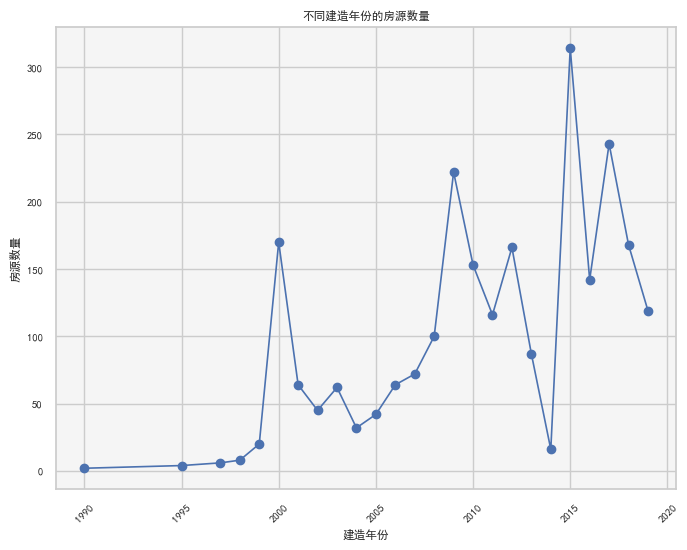

In [36]:
year_counts = xiebq.groupby('建造年份').size().reset_index(name='房源数量')   
x = year_counts['建造年份']  
y = year_counts['房源数量']  
plt.figure(figsize=(8, 6))  
plt.plot(x, y, marker='o') 
plt.title('不同建造年份的房源数量') 
plt.xlabel('建造年份')
plt.ylabel('房源数量') 
plt.xticks(rotation=45) 
plt.show()

## 使用matplotlib库绘制柱状图分析不同区域的二手房单价均价分布

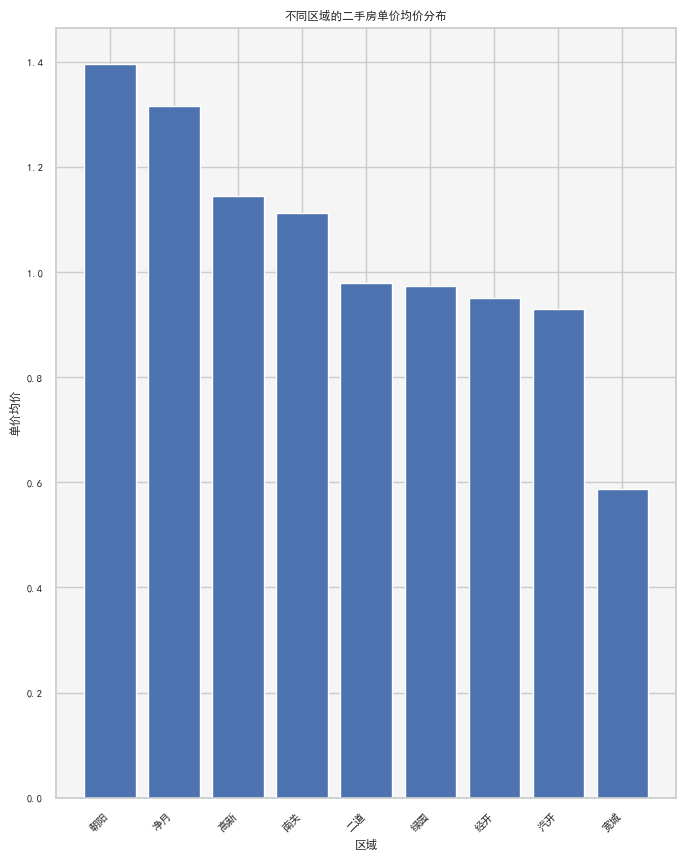

In [37]:
regional_prices = xiebq.groupby('区域').apply(lambda x: x['总价'].sum() / x['建筑面积'].sum()).reset_index()  
regional_prices.columns = ['区域', '单价均价']  
regional_prices_sorted = regional_prices.sort_values(by='单价均价', ascending=False)  
plt.figure(figsize=(8, 10)) 
plt.bar(regional_prices_sorted['区域'], regional_prices_sorted['单价均价'])  
plt.title('不同区域的二手房单价均价分布') 
plt.xlabel('区域')  
plt.ylabel('单价均价') 
plt.xticks(rotation=45, ha='right')
plt.show()

## 使用matplotlib库绘制散点图，探究二手房总价与建筑面积的关系

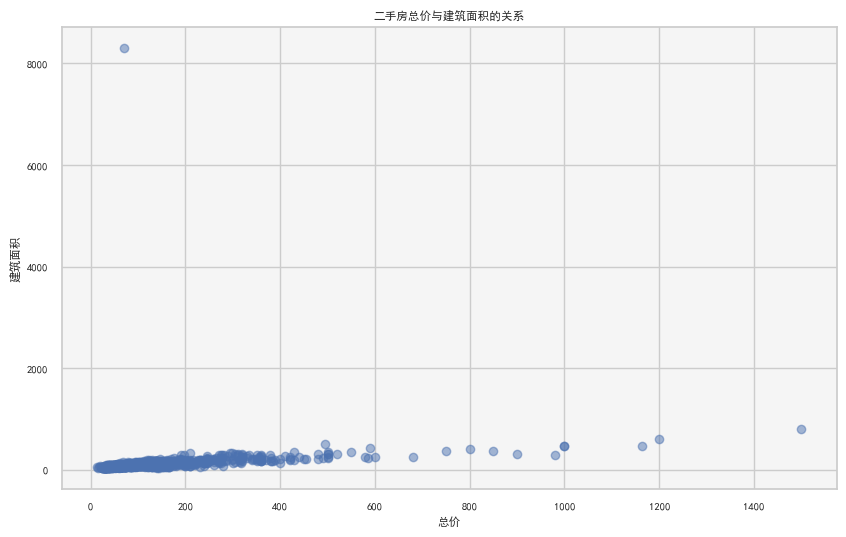

In [38]:
x = xiebq['总价']  
y = xiebq['建筑面积']  
plt.figure(figsize=(10, 6)) 
plt.scatter(x, y, alpha=0.5) 
plt.title('二手房总价与建筑面积的关系')
plt.xlabel('总价') 
plt.ylabel('建筑面积') 
plt.show()

## 使用seaborn库绘制不同朝向和总价的散点图，并使用颜色区分装修

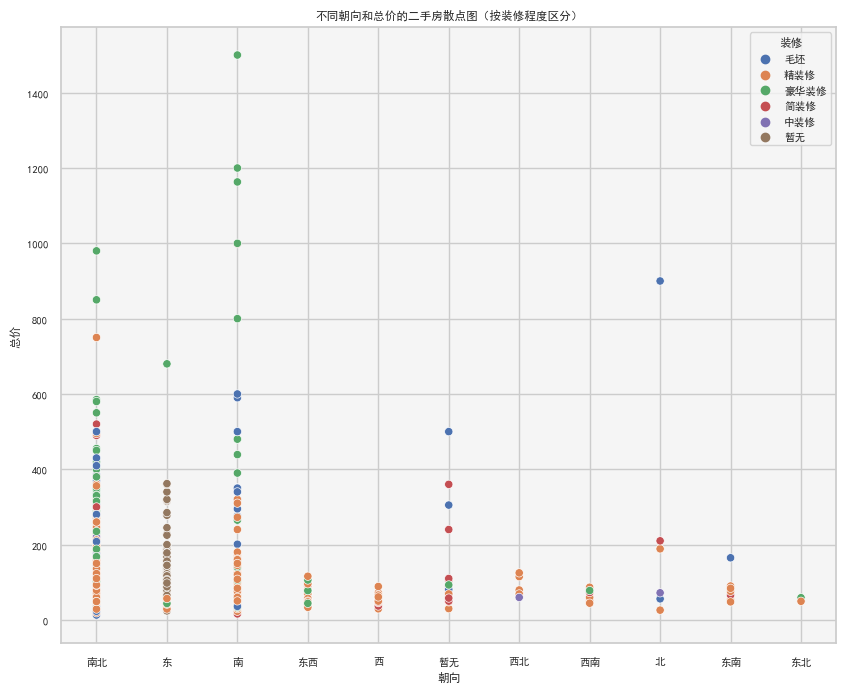

In [39]:
sns.scatterplot(x='朝向', y='总价', hue='装修', data=xiebq)  
plt.title('不同朝向和总价的二手房散点图（按装修程度区分）')  
plt.xlabel('朝向')  
plt.ylabel('总价')  
plt.show()

## 使用seaborn库绘制箱线图分析不同装修情况的二手房单价分布(注意：不需要处理异常值)

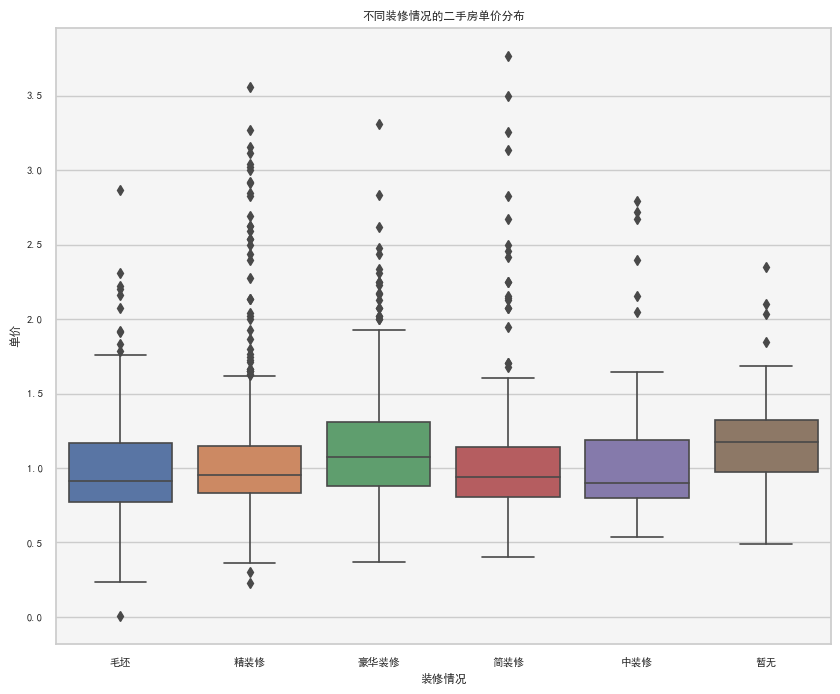

In [40]:
sns.boxplot(x='装修', y='单价', data=xiebq)   
plt.title('不同装修情况的二手房单价分布')  
plt.xlabel('装修情况')  
plt.ylabel('单价')  
plt.show()

## 使用serborn库绘制相关性热力图，分析并展示总价、建筑面积、单价以及物业费这些变量之间的相关性

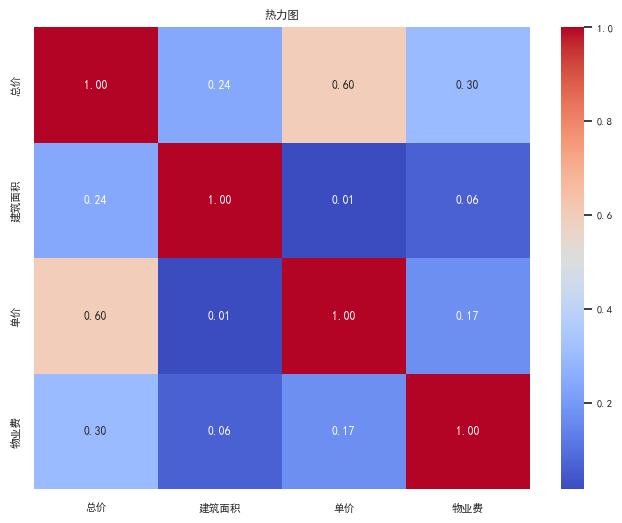

In [41]:
corr_matrix = xiebq[['总价', '建筑面积', '单价', '物业费']].corr()  
plt.figure(figsize=(8, 6)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",  xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)  
plt.title('热力图')  
plt.show()

## 使用pyecharts库绘制不同户型的二手房数量柱状图

In [42]:
house_types = xiebq['户型'].unique().tolist()  # 获取所有唯一的户型  
counts =  xiebq['户型'].value_counts().tolist()     # 对每个户型求和二手房数量  
bar = Bar()  
bar.add_xaxis(house_types)  
bar.add_yaxis("二手房数量", counts)   
bar.set_global_opts(title_opts=opts.TitleOpts(title="不同户型的二手房数量"))  
bar.render("different_house_types_bar_chart.html")  
bar.render_notebook()

## 使用pyecharts库绘制饼图进行二手房数据的区域占比分析

In [43]:
region_counts = xiebq.groupby('区域').sum().reset_index()  
regions = region_counts['区域'].tolist()   
pie = Pie()  
pie.add("", [list(z) for z in zip(regions, counts)])  
pie.set_global_opts(title_opts=opts.TitleOpts(title="二手房区域占比分析"),legend_opts=opts.LegendOpts(is_show=False))  
pie.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c} ({d}%)")) 
pie.render("second_hand_house_pie_chart.html")  
from pyecharts.globals import SymbolType  
pie.render_notebook()

# 机器学习算法

## 使用K-means聚类算法对二手房市场进行细分，基于总价、建筑面积、单价、建造年份这四个字段，将房源划分为三个不同的市场细分，可视化聚类结果，并分析每个市场细分的特点。

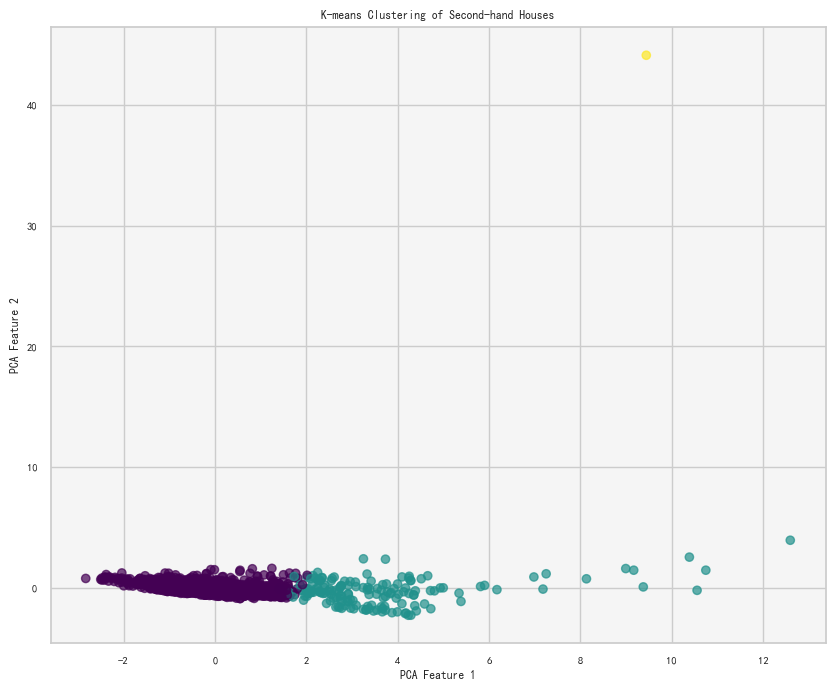

细分市场 1:
平均总价: 95.55112137203166
平均建筑面积: 96.59010993843448
平均单价: 0.9794571831573539
平均建造年份: 2010.7317502198769

细分市场 2:
平均总价: 338.2716049382716
平均建筑面积: 184.65438271604938
平均单价: 1.9967380632838256
平均建造年份: 2014.8395061728395

细分市场 3:
平均总价: 70.0
平均建筑面积: 8300.0
平均单价: 0.008433734939759036
平均建造年份: 2013.0



In [45]:
features = ['总价', '建筑面积', '单价', '建造年份']  
X = xiebq[features]  
scaler =  StandardScaler() 
X_scaled = scaler.fit_transform(X)  
kmeans = KMeans(n_clusters=3, random_state=42)  
clusters = kmeans.fit_predict(X_scaled)  
xiebq['细分市场'] = clusters    
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)  
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)  
plt.xlabel('PCA Feature 1')  
plt.ylabel('PCA Feature 2')  
plt.title('K-means Clustering of Second-hand Houses')  
plt.show()  
for i in range(3):  
    subset = xiebq[xiebq['细分市场'] == i]  
    print(f"细分市场 {i+1}:")  
    print(f"平均总价: {subset['总价'].mean()}")  
    print(f"平均建筑面积: {subset['建筑面积'].mean()}")  
    print(f"平均单价: {subset['单价'].mean()}")  
    print(f"平均建造年份: {subset['建造年份'].mean()}")  
    print()